                                Capstone Project — The Battle of Neighbourhoods
   Introduction:
                New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.

                New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.

                The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

                With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc , as well as traditional categories such as gujarathi,North-indian,South- indian,etc.. So as part of this project , we will list and visualise all major parts of New Delhi City .

   Questions that can be asked using the above mentioned datasets :

1.What is best location in New Delhi City for South Indian Cuisine ?
2.Which areas have large number of South Indian Resturant Market ?
3.Which all areas have less number of resturant ?
4.Which is the best place to stay if I prefer South Indian Cuisine ?
5.What places are have best restaurant in New Delhi?

   Data:
For this project we need the following data :

New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
Data source : Zomato kaggel dataset
Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
Nearby places in each locality of new delhi city.
Data source : Fousquare API
Description : By using this api we will get all the venues in each neighborhood.

   Approach:
Collect the new delhi city data from Zomato kaggel dataset
Using FourSquare API we will find all venues for each neighborhood.
Filter out all venues that are nearby by locality.
Using aggregative rating for each resturant to find the best places.
Visualize the Ranking of neighborhoods using folium library(python)

                                   Installing and importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder
print('All required libraries are imported Successfully')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


All required libraries are imported Successfully


                                   Read the zomato resturant data from csv file

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/rohandharap23/Capstone_Project_Batlle_of_Neighborhoods/master/zomato.csv'
                 ,encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [12]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

                                                Data Cleaning:

                             Remove the unwanted columns and rows from dataset

In [13]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines',
                                               'Aggregate rating','Rating text','Votes']]


In [14]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [15]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

                                    Created map to show the restaurant cluters

In [16]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

                The image may not be visible on Github .I have added in file section named as ndls_restaurant.jpg

In [17]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        0  
2        0  
3        0  
4        0  
5        0

                                What places are have best restaurant in New Delhi?

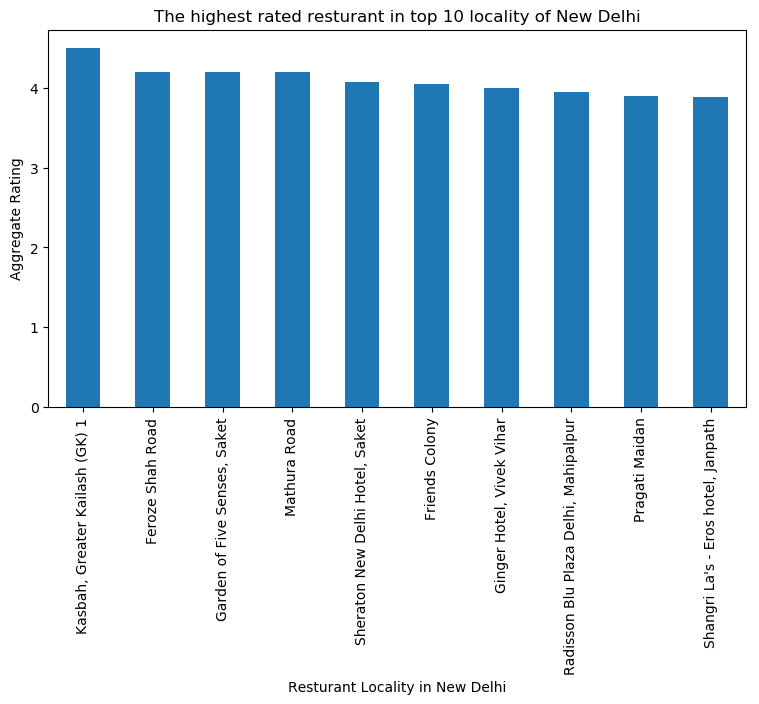

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

                    The best restaurants are available in Kasbah, Greater Kailash area.

                                What places are have worst restaurants in New Delhi?

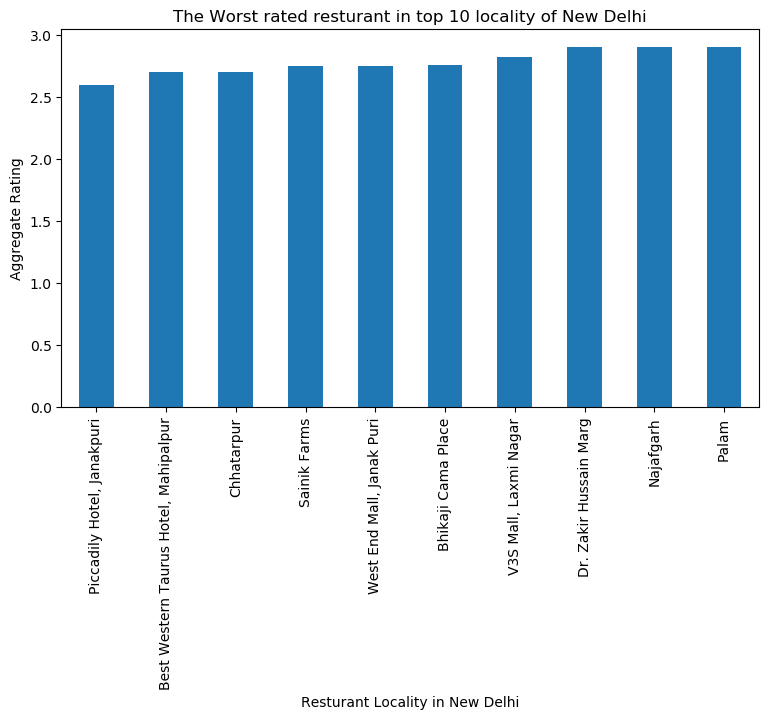

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

                        The worst restarants are available in Piccadily Hotel, Janakpuri.

                        Which place are suitable for edible person in New Delhi city?

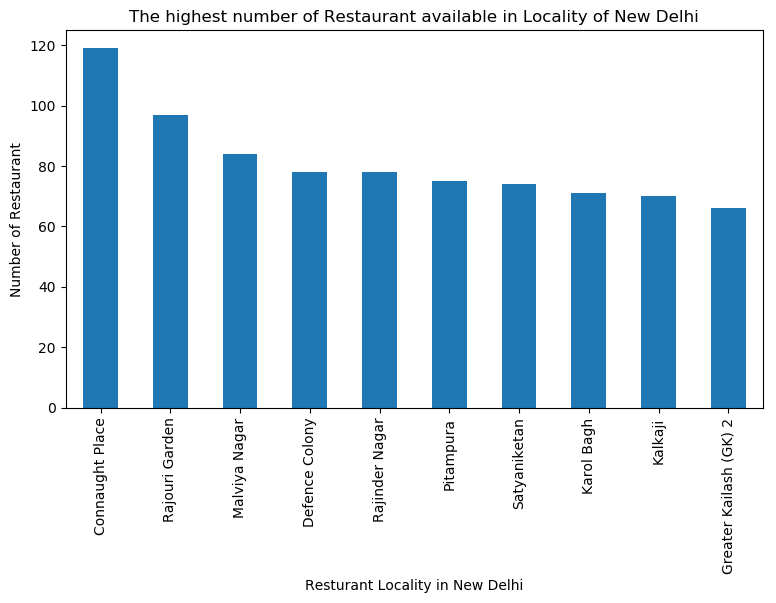

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

                    Connaught Place is the best places for edible person to stay there

                        Which place are not suitable for edible person in New Delhi city?

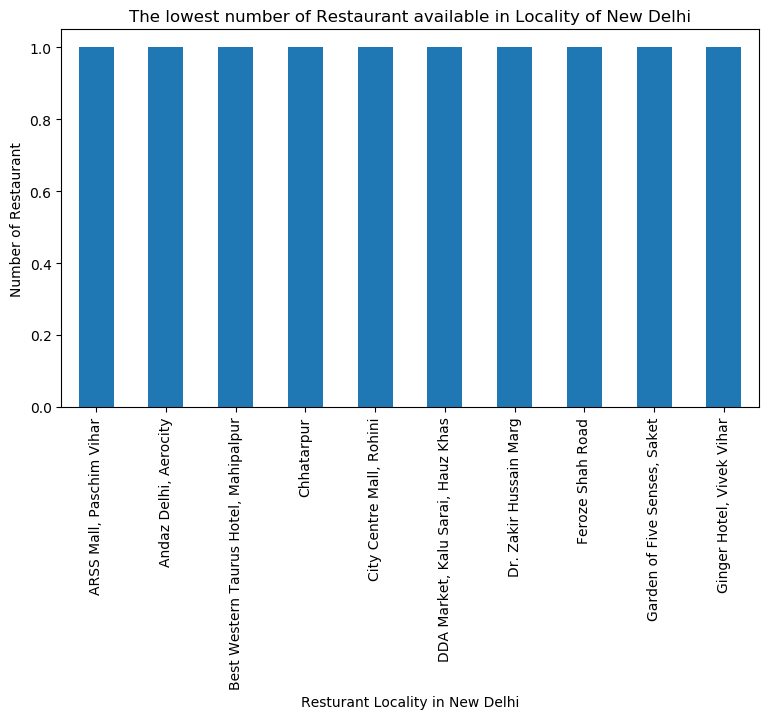

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

                        What are the best places for South Indian restaurant in New Delhi city

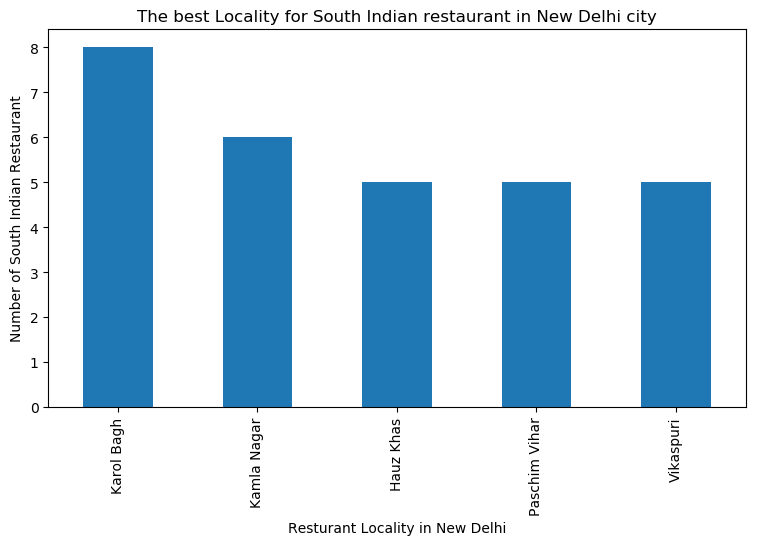

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for South Indian restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('South Indian')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of South Indian Restaurant')

#displays the plot
plt.show()

                    Karol Bagh is the best locality for south indian restaurant

                        Which places are the best South Indian resturants in New Delhi?

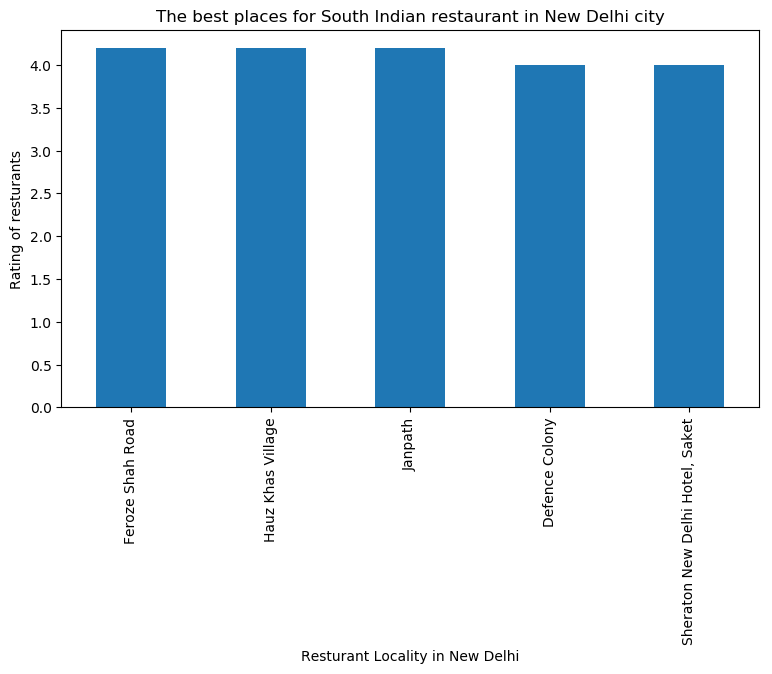

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for South Indian restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('South Indian')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

                            Feroze Shah Road is best South Indian resturants

                                        Data transformation:

                                Based on Locality grouping the data

In [26]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(
    df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [27]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [28]:
df_final.shape

(240, 8)

                                        Define Foursquare Credentials and Version

In [29]:
## Define Foursquare Credentials and Version
CLIENT_ID = '2MEOSI4ZX4YACAIUPUU1V0P4X5FP5IPWF5HIBEX2OUHBIDO3' # Foursquare ID
CLIENT_SECRET = 'FXOIHQM5LCMD1UIYEMV5O0O3QTNFLX0W1TCW41U4GGU55IYP' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2MEOSI4ZX4YACAIUPUU1V0P4X5FP5IPWF5HIBEX2OUHBIDO3
CLIENT_SECRET:FXOIHQM5LCMD1UIYEMV5O0O3QTNFLX0W1TCW41U4GGU55IYP


                    Creating a function to repeat the same process to all the Locality in New Delhi

In [30]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

                                Find the venues in all New Delhi Locality

In [33]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [34]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1  Baljeet's Amritsari Koolcha       28.665768        77.100481   
2                    Pizza Hut       28.670321        77.103853   
3              Café Coffee Day       28.670009        77.102480   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1   Indian Restaurant  
2         Pizza Place  
3         Coffee Shop  
4  Chinese Restaurant

In [35]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  \
Locality                                                            
ARSS Mall, Paschim Vihar                                        9   
Adchini                                                         6   
Aditya Mega Mall, Karkardooma                                  10   
Aerocity                                                        7   
Aggarwal City Mall, Pitampura                                   5   
Aggarwal City Plaza, Rohini                                     6   
Alaknanda                                                       5   
Ambience Mall, Vasant Kunj                                     46   
Anand Lok                                                      11   
Anand Vihar                                                     8   
Andaz Delhi, Aerocity                                          24   
Ansal Plaza Mall, Khel Gaon Marg                                5   
Asaf Ali Road                                                   6   
Ashok Vihar Phase 1                                             7   
Ashok Vihar Phase 2                                             6   
Ashok Vihar Phase 3                                             3   
Barakhamba Road                                                14   
Basant Lok Market, Vasant Vihar                                26   
Bellagio, Ashok Vihar Phase 2                                   6   
Best Western Taurus Hotel, Mahipalpur                          12   
Bhikaji Cama Place                                             12   
Chanakyapuri                                                    5   
Chander Nagar                                                   1   
Chandni Chowk                                                  17   
Chawri Bazar                                                    6   
Chhatarpur                                                      6   
Chittaranjan Park                                               4   
City Centre Mall, Rohini                                        9   
City Square Mall, Rajouri Garden                               23   
Civil Lines                                                     5   
...                                                           ...   
The Lalit New Delhi, Barakhamba Road                            6   
The Leela Ambience Convention Hotel                             5   
The Leela Palace, Chanakyapuri                                 13   
The Lodhi, Lodhi Road                                          14   
The Park, Connaught Place                                      30   
The Suryaa New Delhi, New Friends Colony                       19   
The Taj Mahal Hotel, Mansingh Road                              7   
The Taj Palace Hotel, Chanakyapuri                             34   
The Uppal, Aerocity                                             4   
The Village Restaurant Complex, Khel Gaon Marg                 13   
Tilak Nagar                                                     4   
Tughlakabad Institutional Area                                  5   
Uday Park                                                       6   
Unity One Mall, Janakpuri                                       8   
Uttam Nagar                                                     3   
V3S Mall, Laxmi Nagar                                          16   
Vasant Kunj                                                     8   
Vasant Square Mall, Vasant Kunj                                10   
Vasant Vihar                                                   28   
Vasundhara Enclave                                              2   
Vijay Nagar                                                    14   
Vikas Marg                                                      7   
Vikaspuri                                                       4   
Vivek Vihar                                                     4   
West End Mall, Janak Puri                                      13   
West Gate Mall, Rajouri Garden                

In [36]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 207 uniques categories.


In [37]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                   0        0               0                0   
1                   0        0               0                0   
2                   0        0               0                0   
3                   0        0               0                0   
4                   0        0               0                0   

   Airport Terminal  American Restaurant  ...  Trail  Train Station  \
0                 0                    0  ...      0              0   
1                 0                    0  ...      0              0   
2                 0                    0  ...      0              0   
3                 0                    0  ...      0              0   
4                 0                    0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 208 columns]

In [38]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  \
0                          ARSS Mall, Paschim Vihar  0.111111   
1                                           Adchini  0.000000   
2                     Aditya Mega Mall, Karkardooma  0.000000   
3                                          Aerocity  0.000000   
4                     Aggarwal City Mall, Pitampura  0.000000   
5                       Aggarwal City Plaza, Rohini  0.000000   
6                                         Alaknanda  0.000000   
7                        Ambience Mall, Vasant Kunj  0.000000   
8                                         Anand Lok  0.000000   
9                                       Anand Vihar  0.000000   
10                            Andaz Delhi, Aerocity  0.000000   
11                 Ansal Plaza Mall, Khel Gaon Marg  0.000000   
12                                    Asaf Ali Road  0.000000   
13                              Ashok Vihar Phase 1  0.000000   
14                              Ashok Vihar Phase 2  0.000000   
15                              Ashok Vihar Phase 3  0.000000   
16                                  Barakhamba Road  0.000000   
17                  Basant Lok Market, Vasant Vihar  0.000000   
18                    Bellagio, Ashok Vihar Phase 2  0.000000   
19            Best Western Taurus Hotel, Mahipalpur  0.000000   
20                               Bhikaji Cama Place  0.000000   
21                                     Chanakyapuri  0.000000   
22                                    Chander Nagar  0.000000   
23                                    Chandni Chowk  0.000000   
24                                     Chawri Bazar  0.000000   
25                                       Chhatarpur  0.000000   
26                                Chittaranjan Park  0.000000   
27                         City Centre Mall, Rohini  0.000000   
28                 City Square Mall, Rajouri Garden  0.000000   
29                                      Civil Lines  0.000000   
..                                              ...       ...   
209            The Lalit New Delhi, Barakhamba Road  0.000000   
210             The Leela Ambience Convention Hotel  0.000000   
211                  The Leela Palace, Chanakyapuri  0.000000   
212                           The Lodhi, Lodhi Road  0.000000   
213                       The Park, Connaught Place  0.000000   
214        The Suryaa New Delhi, New Friends Colony  0.000000   
215              The Taj Mahal Hotel, Mansingh Road  0.000000   
216              The Taj Palace Hotel, Chanakyapuri  0.000000   
217                             The Uppal, Aerocity  0.000000   
218  The Village Restaurant Complex, Khel Gaon Marg  0.000000   
219                                     Tilak Nagar  0.000000   
220                  Tughlakabad Institutional Area  0.000000   
221                                       Uday Park  0.000000   
222                       Unity One Mall, Janakpuri  0.000000   
223                                     Uttam Nagar  0.666667   
224                           V3S Mall, Laxmi Nagar  0.000000   
225                                     Vasant Kunj  0.000000   
226                 Vasant Square Mall, Vasant Kunj  0.000000   
227                                    Vasant Vihar  0.000000   
228                              Vasundhara Enclave  0.500000   
229                                     Vijay Nagar  0.000000   
230                                      Vikas Marg  0.000000   
231                                       Vikaspuri  0.000000   
232                                     Vivek Vihar  0.000000   
233                       West End Mall, Janak Puri  0.000000   
234                  West Gate Mall, Rajouri Garden  0.000000   
235                                West Patel Nagar  0.000000   
236                           Worldmark 1, Aerocity  0.000000   
237                                     Yusuf Sarai  0.000000   
238                        ibis New Delhi, Aerocity  0.000000   

     Accesso

In [39]:
New_Delhi_grouped.shape

(239, 208)

In [40]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2              Market  0.11
3         Coffee Shop  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0               Café  0.33
1  Indian Restaurant  0.17
2                Pub  0.17
3   Parsi Restaurant  0.17
4         Restaurant  0.17


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1      Shopping Mall   0.2
2  Indian Restaurant   0.2
3          Multiplex   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1           Coffee Shop  0.14
2  Fast Food Restaurant  0.14
3        Airport Lounge  0.14
4      Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
                  venue  freq
0      Department Store   0.2
1     Indian Restaurant   0.2
2            Donut Shop   0.2
3  Fast Food Restaurant   0.2
4           Pizza Place   0.

4           Gym / Fitness Center  0.17


----DLF Emporio Mall, Vasant Kunj----
                  venue  freq
0           Coffee Shop  0.09
1  Fast Food Restaurant  0.07
2    Italian Restaurant  0.07
3                  Café  0.07
4      Asian Restaurant  0.07


----DLF Place Mall, Saket----
               venue  freq
0  Indian Restaurant  0.11
1             Lounge  0.07
2                Bar  0.07
3     Clothing Store  0.07
4               Café  0.07


----DLF Promenade Mall, Vasant Kunj----
                  venue  freq
0           Coffee Shop  0.09
1  Fast Food Restaurant  0.07
2    Italian Restaurant  0.07
3                  Café  0.07
4      Asian Restaurant  0.07


----DLF South Square, Sarojini Nagar----
                  venue  freq
0     Indian Restaurant  0.25
1         Women's Store  0.17
2  Fast Food Restaurant  0.17
3                Market  0.08
4            Restaurant  0.08


----Daryaganj----
               venue  freq
0  Indian Restaurant  0.31
1              Hotel  0.15
2

               venue  freq
0              Hotel  0.31
1             Buffet  0.07
2        Coffee Shop  0.07
3         Restaurant  0.07
4  Indian Restaurant  0.07


----Jail Road----
                  venue  freq
0     Indian Restaurant  0.22
1  Fast Food Restaurant  0.11
2           Pizza Place  0.11
3     Indian Sweet Shop  0.11
4   Fried Chicken Joint  0.11


----Jama Masjid----
               venue  freq
0  Indian Restaurant  0.43
1        Flea Market  0.14
2             Mosque  0.14
3      Metro Station  0.14
4        Snack Place  0.14


----Janakpuri----
    venue  freq
0    Café   0.4
1    Park   0.2
2     Gym   0.2
3  Bakery   0.2
4     ATM   0.0


----Jangpura----
                  venue  freq
0                  Food  0.17
1  Fast Food Restaurant  0.17
2        Sandwich Place  0.17
3             BBQ Joint  0.17
4    Chinese Restaurant  0.17


----Janpath----
                  venue  freq
0     Indian Restaurant  0.15
1           Coffee Shop  0.08
2    Italian Restaurant  0.08
3

            venue  freq
0     Wings Joint   0.2
1       Juice Bar   0.2
2  Ice Cream Shop   0.2
3            Café   0.2
4  Sandwich Place   0.2


----Mayur Vihar Phase 3----
                     venue  freq
0                    Hotel   1.0
1                      ATM   0.0
2  North Indian Restaurant   0.0
3            Moving Target   0.0
4       Mughlai Restaurant   0.0


----Mehrauli----
                 venue  freq
0      Thai Restaurant  0.23
1                  Bar  0.15
2               Lounge  0.08
3             Boutique  0.08
4  Monument / Landmark  0.08


----Metro Walk Mall, Rohini----
                  venue  freq
0            Theme Park  0.17
1  Fast Food Restaurant  0.17
2         Shopping Mall  0.17
3      Asian Restaurant  0.17
4        Clothing Store  0.17


----Model Town 1----
               venue  freq
0         Playground   0.2
1          Pool Hall   0.2
2  Convenience Store   0.2
3               Lake   0.2
4         Food Truck   0.2


----Model Town 2----
             

                  venue  freq
0                 Hotel  0.33
1     Indian Restaurant  0.17
2            Food Truck  0.17
3           Coffee Shop  0.17
4  Fast Food Restaurant  0.17


----Rajendra Place----
                            venue  freq
0                     Pizza Place   0.2
1            Fast Food Restaurant   0.2
2              Light Rail Station   0.1
3  Multicuisine Indian Restaurant   0.1
4                             Bar   0.1


----Rajinder Nagar----
                  venue  freq
0     Food & Drink Shop  0.12
1           Pizza Place  0.12
2   Sporting Goods Shop  0.12
3                  Café  0.12
4  Gym / Fitness Center  0.12


----Rajouri Garden----
                  venue  freq
0     Indian Restaurant  0.23
1                  Café  0.15
2           Snack Place  0.08
3             BBQ Joint  0.08
4  Fast Food Restaurant  0.08


----Rohini----
                         venue  freq
0             Department Store  0.25
1            Indian Restaurant  0.25
2           Light

4         Pizza Place  0.07


----The Park, Connaught Place----
                venue  freq
0               Hotel  0.13
1                 Spa  0.07
2  Italian Restaurant  0.07
3         Coffee Shop  0.07
4   Indian Restaurant  0.07


----The Suryaa New Delhi, New Friends Colony----
            venue  freq
0            Café  0.16
1     Pizza Place  0.05
2           Hotel  0.05
3   Movie Theater  0.05
4  Sandwich Place  0.05


----The Taj Mahal Hotel, Mansingh Road----
                 venue  freq
0            Hotel Bar  0.29
1  Japanese Restaurant  0.14
2   Chinese Restaurant  0.14
3    Indian Restaurant  0.14
4               Lounge  0.14


----The Taj Palace Hotel, Chanakyapuri----
                venue  freq
0   Indian Restaurant  0.12
1               Hotel  0.12
2                Café  0.09
3  Chinese Restaurant  0.06
4          Hotel Pool  0.03


----The Uppal, Aerocity----
                     venue  freq
0                    Hotel  0.75
1        Indian Restaurant  0.25
2           

In [41]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality    1st Most Common Venue  \
0                          ARSS Mall, Paschim Vihar        Indian Restaurant   
1                                           Adchini                     Café   
2                     Aditya Mega Mall, Karkardooma              Pizza Place   
3                                          Aerocity                    Hotel   
4                     Aggarwal City Mall, Pitampura              Pizza Place   
5                       Aggarwal City Plaza, Rohini              Pizza Place   
6                                         Alaknanda  New American Restaurant   
7                        Ambience Mall, Vasant Kunj              Coffee Shop   
8                                         Anand Lok                     Café   
9                                       Anand Vihar                     Café   
10                            Andaz Delhi, Aerocity                    Hotel   
11                 Ansal Plaza Mall, Khel Gaon Marg         Department Store   
12                                    Asaf Ali Road        Indian Restaurant   
13                              Ashok Vihar Phase 1              Pizza Place   
14                              Ashok Vihar Phase 2              Pizza Place   
15                              Ashok Vihar Phase 3              Pizza Place   
16                                  Barakhamba Road        Indian Restaurant   
17                  Basant Lok Market, Vasant Vihar                     Café   
18                    Bellagio, Ashok Vihar Phase 2              Pizza Place   
19            Best Western Taurus Hotel, Mahipalpur                    Hotel   
20                               Bhikaji Cama Place                   Lounge   
21                                     Chanakyapuri       African Restaurant   
22                                    Chander Nagar              Pizza Place   
23                                    Chandni Chowk        Indian Restaurant   
24                                     Chawri Bazar        Indian Restaurant   
25                                       Chhatarpur        Indian Restaurant   
26                                Chittaranjan Park                   Market   
27                         City Centre Mall, Rohini            Shopping Mall   
28                 City Square Mall, Rajouri Garden     Fast Food Restaurant   
29                                      Civil Lines       Chinese Restaurant   
..                                              ...                      ...   
209            The Lalit New Delhi, Barakhamba Road        Indian Restaurant   
210             The Leela Ambience Convention Hotel        Indian Restaurant   
211                  The Leela Palace, Chanakyapuri        Indian Restaurant   
212                           The Lodhi, Lodhi Road        Indian Restaurant   
213                       The Park, Connaught Place                    Hotel   
214        The Suryaa New Delhi, New Friends Colony                     Café   
215              The Taj Mahal Hotel, Mansingh Road                Hotel Bar   
216              The Taj Palace Hotel, Chanakyapuri                    Hotel   
217                             The Uppal, Aerocity                    Hotel   
218  The Village Restaurant Complex, Khel Gaon Marg        Indian Restaurant   
219                                     Tilak Nagar     Fast Food Restaurant   
220                  Tughlakabad Institutional Area               Restaurant   
221                                       Uday Park     Fast Food Restaurant   
222                       Unity One Mall, Janakpuri        Indian Restaurant   
223                                     Uttam Nagar                      ATM   
224                           V3S Mall, Laxmi Nagar                      Gym   
225                                     Vasant Kunj              Pizza Place   
226                 Vasant Square Mall, Vasant Kunj              Pizza Place   
227                                    Vasa

In [43]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(239,)

In [45]:
# add clustering labels
New_Delhi_merged = df_final.head(239)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               3   
1  Average, Good, Poor, Very Good         1560               4   
2                   Average, Good          434               3   
3                         Average           59               1   
4                         Average          126               3   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM        Sandwich Place   
1                  Café     Indian Restaurant                   Pub   
2           Pizza Place         Shopping Mall             Multiplex   
3                 Hotel        Airport Lounge      Airport Terminal   
4           Pizza Place     Indian Restaurant      Department Store   

  4th Most Common Venue           5th Most Common Venue 6th Most Common Venue  \
0                Market  Multicuisine Indian Restaurant           Coffee Shop   
1            Restaurant                Parsi Restaurant    Dim Sum Restaurant   
2     Indian Restaurant                           Hotel                  Café   
3           Coffee Shop            Fast Food Restaurant   Rental Car Location   
4            Donut Shop            Fast Food Restaurant        Farmers Market   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0    Chinese Restaurant           Pizza Place      Airport Terminal   
1          Dessert Shop     French Restaurant            Food Truck   
2    African Restaurant  Fast Food Restaurant   Fried Chicken Joint   
3         Women's Store        Farmers Market   Fried Chicken Joint   
4   Fried Chicken Joint     French Restaurant            Food Truck   

  10th Most Common Venue  
0     Dim Sum Restaurant  
1             Food Court  
2      French Restaurant  
3      French Restaurant  
4             Food Court

In [46]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

        The image may not be visible on Github account.I have added image of it named map_clusters in file section

In [47]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(
    range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
5    28.700516    3.040000                  Average, Good, Poor          594   
6    28.527088    3.117391                  Average, Good, Poor         1012   
11   28.562580    3.750000             Average, Good, Very Good          875   
26   28.538688    3.130303                  Average, Good, Poor         2578   
29   28.681233    3.300000             Average, Good, Very Good          769   
34   28.720602    3.600000                                 Good          119   
37   28.541903    3.000000                              Average            4   
38   28.702961    3.225000                        Average, Good          168   
48   28.630149    2.950000                  Average, Good, Poor          471   
50   28.645084    3.235000       Average, Good, Poor, Very Good         2578   
51   28.557166    3.080000                   Average, Very Good         1120   
52   28.551417    3.505000             Average, Good, Very Good         7446   
53   28.549856    3.720000             Average, Good, Very Good          352   
54   28.543798    3.500000                        Average, Good          502   
59   28.654883    3.053846                        Average, Good          262   
67   28.554545    3.251786  Average, Excellent, Good, Very Good         5479   
72   28.705700    3.350000                        Average, Good          278   
73   28.643036    3.000000                              Average            7   
74   28.621267    3.416667                        Average, Good          475   
87   28.582031    3.117143       Average, Good, Poor, Very Good         2140   
90   28.642755    3.450000                        Average, Good          322   
93   28.554084    3.541667             Average, Good, Very Good         3781   
94   28.538153    3.117143                  Average, Good, Poor         3642   
96   28.516316    3.200000                              Average           95   
101  28.667644    3.300000                              Average          132   
103  28.652501    3.080000                  Average, Good, Poor         2196   
105  28.526489    3.300000                        Average, Good          228   
109  28.689561    3.311111                   Average, Very Good          903   
125  28.627715    3.125000                        Average, Good          171   
130  28.724100    3.133333                              Average          325   
..         ...         ...                                  ...          ...   
154  28.618935    2.900000                              Average            9   
155  28.669160    3.148214                  Average, Good, Poor         2735   
157  28.629505    2.600000                              Average           67   
161  28.639872    3.134483                  Average, Good, Poor         1481   
167  28.599082    2.900000                              Average            9   
170  28.643757    3.575000                        Average, Good         2879   
171  28.639604    3.056410       Average, Good, Poor, Very Good         5168   
177  28.511482    2.750000                        Average, Poor          107   
183  28.670776    3.100000                              Average            9   
185  28.683364    3.000000                        Average, Good          586   
187  28.629634    2.942857                              Average          151   
188  28.707685    3.168182             Average, Good, Very Good         1668   
189  28.620715    3.880000             Average, Good, Very Good          626   
194  28.566717    3.303125             Average, Good, Very Good         2411   
196  28.680905    3.320000                        Average, Good          286   
198  28.636712    3.023529                        Average, Poor          185   
206  28.538993    3.450000                        Average, Good          242   
212  28.592147    3.350000                        Average, Good          189   
213  28.623

In [48]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(
    range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
19   28.548827    2.700000                              Average            9   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
128  28.608252    2.945000                        Average, Good          406   
146  28.535040    3.175000                        Average, Good           60   
149  28.642910    2.996552       Average, Good, Poor, Very Good         2850   
162  28.725814    3.050000                              Average           50   
163  28.552711    3.100000                              Average            7   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
169  28.667261    3.200000                              Average           76   
174  28.550802    3.250000                        Average, Good           34   
197  28.592724    2.985714                              Average          560   
205  28.600171    3.714286             Average, Good, Very Good         1733   
217  28.535183    3.066667                              Average           37   
236  28.648177    3.675000             Average, Good, Very Good          876   
238  28.559928    3.075000                        Average, Good          923   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 1                 Hotel        Airport Lounge   
10                1                 Hotel     Indian Restaurant   
19                1                 Hotel     Indian Restaurant   
35                1                 Hotel           Pizza Place   
56                1                 Hotel      Sculpture Garden   
60                1                 Hotel      Asian Restaurant   
69                1                 Hotel     Indian Restaurant   
70                1                 Hotel            Restaurant   
83                1                 Hotel     Indian Restaurant   
111               1                 Hotel     Indian Restaurant   
112               1                 Hotel     Indian Restaurant   
119               1                 Hotel   American Restaurant   
128               1                 Hotel         Women's Store   
146               1                   ATM                 Hotel   
149               1                 Hotel     Indian Restaurant   
162               1                 Hotel                  Café   
163               1                 Hotel     Indian Restaurant   
168               1     Indian Restaurant             Hotel Bar   
169               1                 Hotel     Indian Restaurant   
174               1                 Hotel     Indian Restaurant   
197               1                 Hotel      Department Store   
205               1                 Hotel            Smoke Shop   
217               1                 Hotel     Indian Restaurant   
236               1           Pizza Place                  Park   
238               1     Indian Restaurant           Coffee Shop   

    3rd Most Common Venue 4th Most Common Venue      5th Most Common Venue  \
3        Airport Terminal           Coffee Shop       Fast Food Restaurant   
10            Coffee Shop      

In [49]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(
    range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
15   28.691136    3.390909        Average, Good, Very Good          485   
22   28.654105    3.085714                         Average           80   
57   28.699837    3.376471        Average, Good, Very Good         2460   
104  28.656263    3.097619                   Average, Good          965   
110  28.635391    3.040385  Average, Good, Poor, Very Good         2442   
135  28.579641    3.180000                   Average, Good          202   
235  28.652978    3.500000                            Good          178   

     Cluster Labels 1st Most Common Venue    2nd Most Common Venue  \
15                2           Pizza Place  South Indian Restaurant   
22                2           Pizza Place      Indie Movie Theater   
57                2           Pizza Place               Food Truck   
104               2           Pizza Place        Accessories Store   
110               2           Pizza Place                   Bakery   
135               2           Pizza Place                     Café   
235               2  Fast Food Restaurant                     Café   

    3rd Most Common Venue    4th Most Common Venue 5th Most Common Venue  \
15                 Garden           Farmers Market   Fried Chicken Joint   
22     Frozen Yogurt Shop      Fried Chicken Joint     French Restaurant   
57    Indie Movie Theater       Frozen Yogurt Shop   Fried Chicken Joint   
104        Farmers Market       Frozen Yogurt Shop   Fried Chicken Joint   
110                Office                   Arcade        Farmers Market   
135      Department Store  South Indian Restaurant   Fried Chicken Joint   
235            Hookah Bar                Multiplex         Shopping Mall   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
15      French Restaurant            Food Truck            Food Court   
22             Food Truck            Food Court     Food & Drink Shop   
57      French Restaurant            Food Court     Food & Drink Shop   
104     French Restaurant            Food Truck            Food Court   
110   Fried Chicken Joint     French Restaurant            Food Truck   
135     French Restaurant            Food Truck            Food Court   
235        Clothing Store            Restaurant     Indian Restaurant   

    9th Most Common Venue 10th Most Common Venue  
15      Food & Drink Shop                   Food  
22                   Food            Flea Market  
57                   Food            Flea Market  
104     Food & Drink Shop                   Food  
110            Food Court      Food & Drink Shop  
135     Food & Drink Shop                   Food  
235           Pizza Place            Snack Place

In [50]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(
    range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
0    28.668945    3.100000                                    Average   
2    28.656131    3.275000                              Average, Good   
4    28.690020    3.033333                                    Average   
12   28.641698    3.050000                                    Average   
13   28.690182    3.090000                        Average, Good, Poor   
14   28.693969    3.378571                              Average, Good   
18   28.696302    3.300000                              Average, Good   
23   28.656414    3.358182                   Average, Good, Very Good   
24   28.649658    3.800000        Average, Excellent, Good, Very Good   
25   28.495624    2.700000                                    Average   
33   28.657388    3.320000                              Average, Good   
36   28.692546    3.480000                              Average, Good   
42   28.576161    2.983333                        Average, Good, Poor   
43   28.643320    3.287500             Average, Good, Poor, Very Good   
44   28.574288    3.496154             Average, Good, Poor, Very Good   
46   28.573241    3.225000                        Average, Good, Poor   
47   28.681582    3.046875                        Average, Good, Poor   
49   28.602169    2.900000                                    Average   
55   28.617102    4.200000                                  Very Good   
61   28.668181    3.400000                                    Average   
65   28.556980    3.272414                        Average, Good, Poor   
66   28.699373    3.252174                              Average, Good   
71   28.641003    3.650000                              Average, Good   
76   28.576785    3.200000                              Average, Good   
77   28.631728    3.060714             Average, Good, Poor, Very Good   
80   28.611614    3.366667                              Average, Good   
84   28.630942    3.122000             Average, Good, Poor, Very Good   
85   28.648885    3.561111                   Average, Good, Very Good   
92   28.584294    3.100000                                    Average   
97   28.662972    3.533333                         Average, Very Good   
..         ...         ...                                        ...   
113  28.541242    2.984615                                    Average   
116  28.486576    2.950000                                    Average   
118  28.646549    3.200000                                    Average   
124  28.521760    4.200000                                  Very Good   
126  28.602860    2.973214                        Average, Good, Poor   
133  28.708185    3.344444                   Average, Good, Very Good   
138  28.556145    3.040909                        Average, Good, Poor   
140  28.627959    3.004167                                    Average   
142  28.693270    3.519149                   Average, Good, Very Good   
144  28.591092    3.200000                        Average, Good, Poor   
153  28.608055    3.860000                   Average, Good, Very Good   
156  28.630734    3.185714                              Average, Good   
158  28.700027    3.157333                        Average, Good, Poor   
160  28.712975    3.066667                                    Average   
164  28.668055    3.393333        Average, Excellent, Good, Very Good   
165  28.539464    2.900000                                    Average   
172  28.644281    3.626804  Average, Excellent, Good, Poor, Very Good   
173  28.714176    3.352083             Average, Good, Poor, Very Good   
176  28.562460    3.269231             Average, Good, Poor, Very Good   
181  28.571849    3.316667                              Average, Good   
186  28.548922    3.715385  Average, Excellent, Good, Poor, Very Good   
193  28.569983    3.133333                        Average, Good, Poor   
199  28.601779    3.700000                   Average, Good, Very Good

In [51]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(
    range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
1    28.537063    3.292308             Average, Good, Poor, Very Good   
7    28.541298    3.425000                   Average, Good, Very Good   
8    28.555599    3.800000                         Average, Very Good   
9    28.659870    3.281481                              Average, Good   
16   28.630440    3.208333                        Average, Good, Poor   
17   28.557846    3.220000                        Average, Good, Poor   
20   28.568193    2.755556                              Average, Poor   
21   28.589797    3.085714                        Average, Good, Poor   
27   28.716874    3.400000                                    Average   
28   28.650254    3.166667                              Average, Good   
30   28.561898    3.100000                              Average, Good   
31   28.632091    3.779832        Average, Excellent, Good, Very Good   
32   28.718351    3.150000                              Average, Good   
39   28.543269    3.650000                                       Good   
40   28.528657    3.700000                   Average, Good, Very Good   
41   28.542647    3.761538                   Average, Good, Very Good   
45   28.696802    3.296296  Average, Excellent, Good, Poor, Very Good   
58   28.514237    4.200000                                  Very Good   
62   28.550319    3.701562        Average, Excellent, Good, Very Good   
63   28.535531    3.553030  Average, Excellent, Good, Poor, Very Good   
64   28.538014    3.475000                              Average, Good   
68   28.554275    3.845833        Average, Excellent, Good, Very Good   
75   28.569040    3.800000                            Good, Very Good   
78   28.597665    3.733333                   Average, Good, Very Good   
79   28.631930    3.300000                              Average, Good   
81   28.536611    3.380000                         Average, Excellent   
82   28.548371    3.137500                        Average, Good, Poor   
86   28.624632    3.315217  Average, Excellent, Good, Poor, Very Good   
88   28.626322    3.587500        Average, Excellent, Good, Very Good   
89   28.539003    3.150000                        Average, Good, Poor   
..         ...         ...                                        ...   
127  28.619410    3.134615                        Average, Good, Poor   
129  28.523047    2.925000                                    Average   
143  28.564494    3.140625                   Average, Good, Very Good   
147  28.523307    3.430769             Average, Good, Poor, Very Good   
148  28.642402    3.195652                              Average, Good   
159  28.613748    3.900000                         Average, Excellent   
166  28.569093    3.175000             Average, Good, Poor, Very Good   
175  28.546931    3.223077                              Average, Good   
178  28.520095    3.256250             Average, Good, Poor, Very Good   
179  28.572117    3.871429                   Average, Good, Very Good   
180  28.534499    3.000000                        Average, Good, Poor   
182  28.587918    3.541892  Average, Excellent, Good, Poor, Very Good   
184  28.528743    3.764000  Average, Excellent, Good, Poor, Very Good   
190  28.577107    3.100000                                    Average   
191  28.522279    3.100000                                    Average   
192  28.526856    4.066667                                  Very Good   
195  28.527731    3.450000                              Average, Good   
200  28.564288    3.200000                                    Average   
201  28.651299    3.500000                              Average, Good   
203  28.601187    3.633333                              Average, Good   
207  28.625445    3.600000                   Average, Good, Very Good   
208  28.562469    2.971429                        Average, Good, Poor   
210  28.661133    3.775000                            Good, Very Good

                                                    Conclusion:
Karol bagh,Kamla nagar ,Hauz Khas are some of the best neighborhoods for South Indian cuisine.
Feroze Shah Road,Hauz Khas Village,janpath have the best Chinese Resturant.
Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
Greater kailash, Feroze shah road, Saket have best resturants in New Delhi. #### Cluster 1: It is most recommended for Fast Food Restaurants & Chinese Resturants. #### Cluster 2: It is most recommended for Hotels and Indian Restaurants. #### Cluster 3 and Cluster 5: It is most recommended for Pizza  and Cafe. #### Cluster 4: It is most recommended for the Indian and Italian Restaurants.